<a href="https://colab.research.google.com/github/RubenRomeroTorrado/AVCADPROJ4/blob/main/Diogo_e_Ruben1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      edu_none  edu_basic  edu_secondary  edu_superior  labour_family  \
year                                                                    
1989     22584      17348            832            88          24936   
1999     11724      11020            832           368          12208   
2009      5756       8488            968           412           8588   
2019      2552       7664           1468           680           5256   

      labour_holder  labour_spouse  labour_other_family  labour_non_family  \
year                                                                         
1989          10304           7604                 7056               1448   
1999           5988           4024                 2208                664   
2009           4516           2856                 1232                324   
2019           2904           1708                  664                424   

      labour_regular  ...  labour_non_regular_prop  labour_not_hired_prop  \
year           

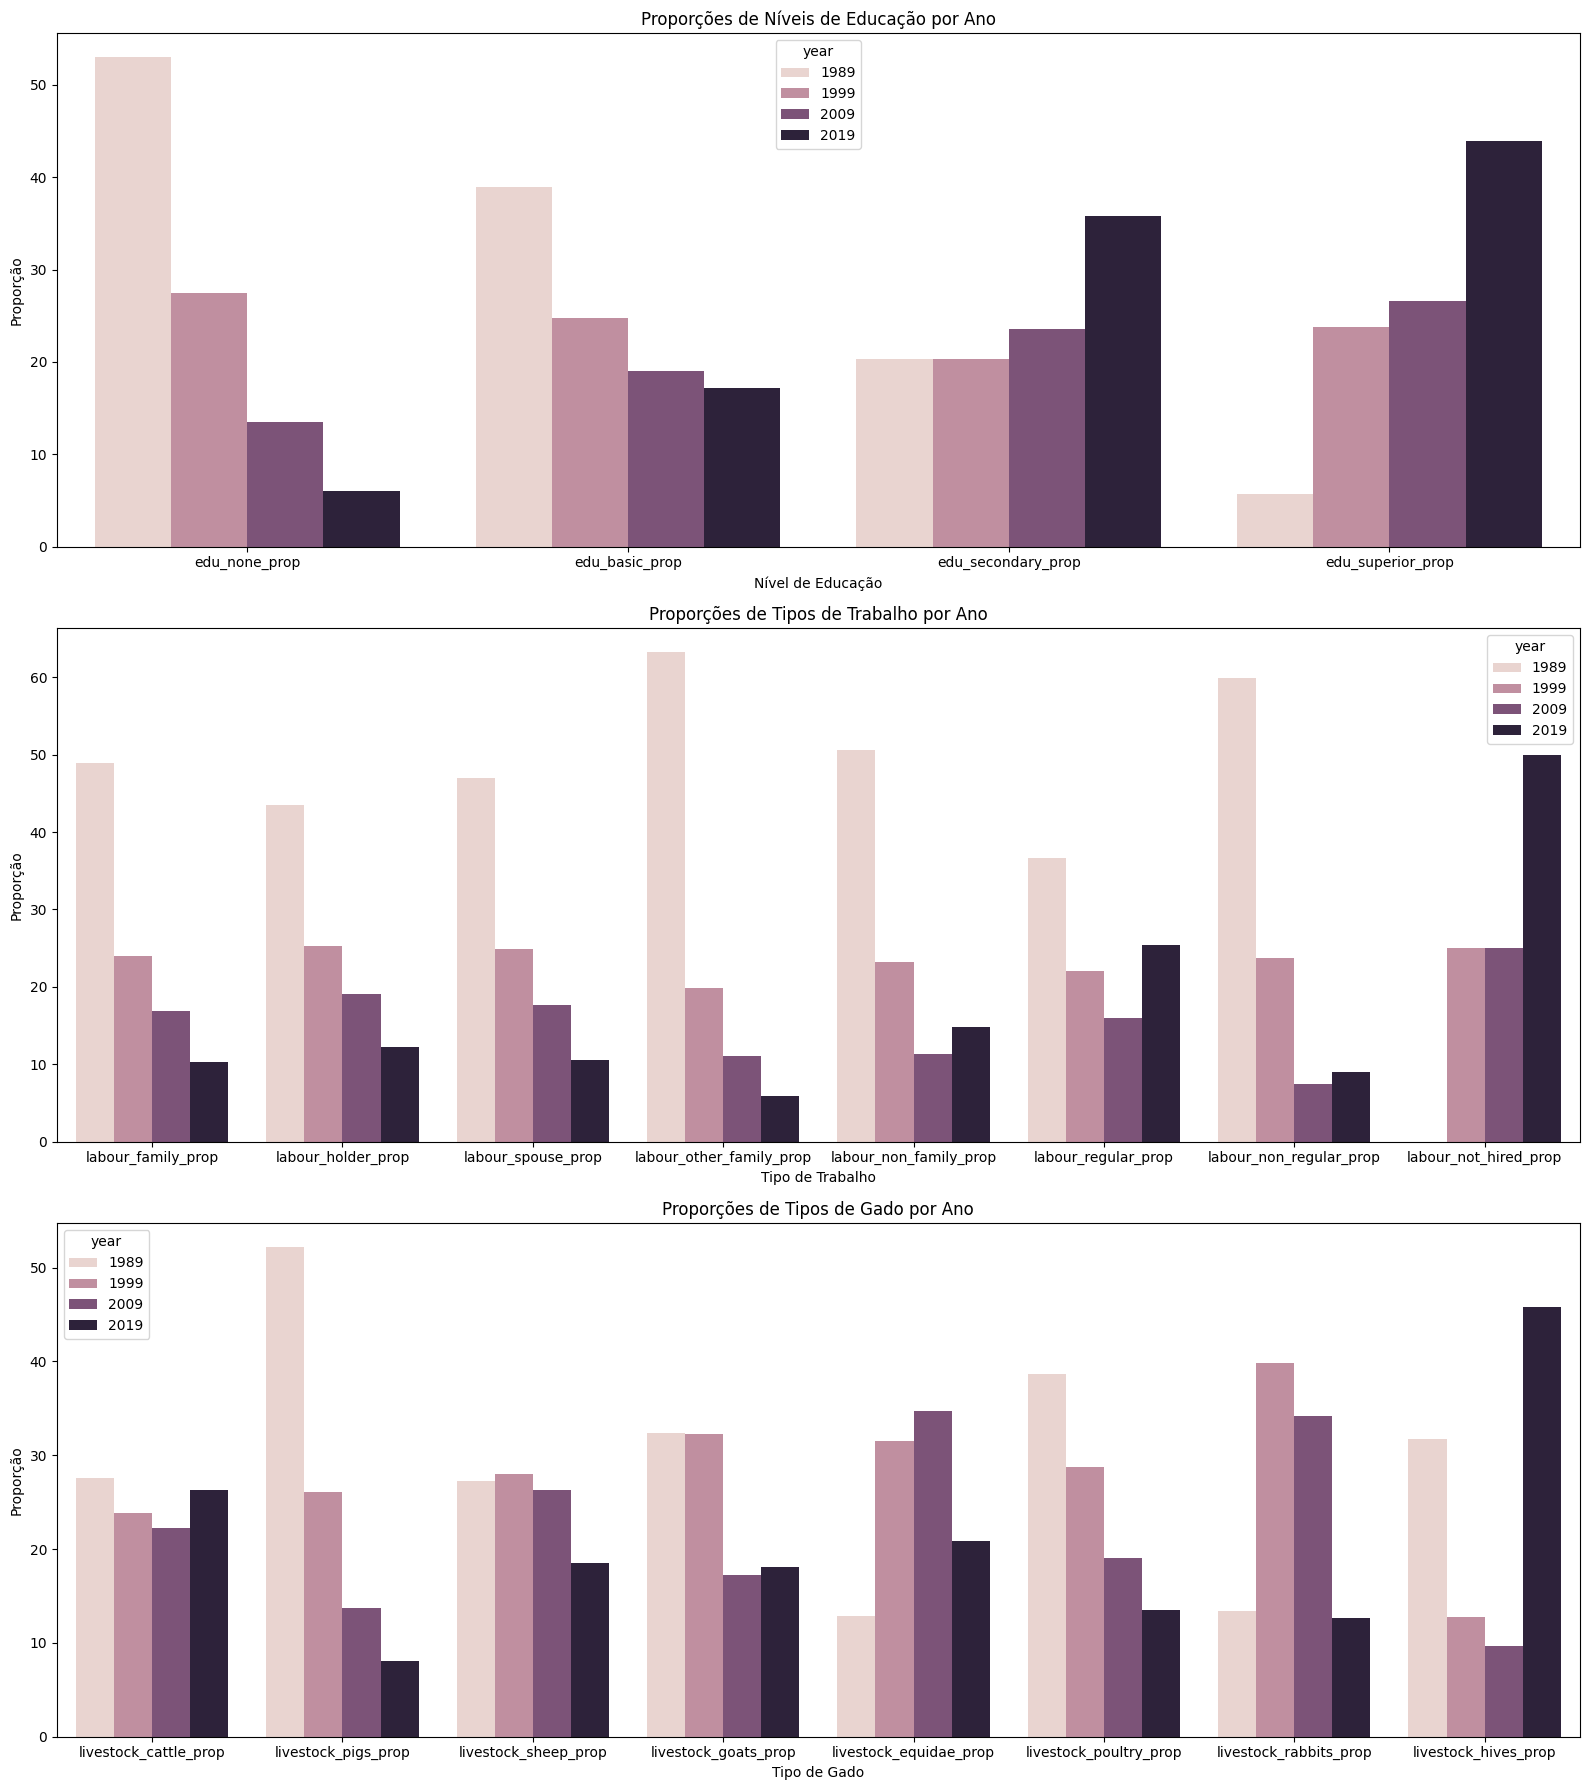

        Education             Labor          Livestock  Correlation   P-value
0        edu_none     labour_family   livestock_cattle     0.513036  0.486964
1        edu_none     labour_family     livestock_pigs     0.998465  0.001535
2        edu_none     labour_family    livestock_sheep     0.656222  0.343778
3        edu_none     labour_family    livestock_goats     0.846127  0.153873
4        edu_none     labour_family  livestock_equidae    -0.573393  0.426607
..            ...               ...                ...          ...       ...
251  edu_superior  labour_not_hired    livestock_goats    -0.739446  0.260554
252  edu_superior  labour_not_hired  livestock_equidae     0.348353  0.651647
253  edu_superior  labour_not_hired  livestock_poultry    -0.952537  0.047463
254  edu_superior  labour_not_hired  livestock_rabbits    -0.019174  0.980826
255  edu_superior  labour_not_hired    livestock_hives     0.317936  0.682064

[256 rows x 5 columns]


In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar os dados
file_path = '/content/gado_e_dados_socio_economicos_aggregated_2_202406131349 (2).csv'
data = pd.read_csv(file_path)

# Definir as colunas relevantes
education_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
labor_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
                 'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep',
                     'livestock_goats', 'livestock_equidae', 'livestock_poultry',
                     'livestock_rabbits', 'livestock_hives']
time_column = 'year'  # Substitua pelo nome correto da coluna de tempo, se diferente

# Selecionar os anos de interesse
years_of_interest = [1989, 1999, 2009, 2019]

# Filtrar os dados para os anos de interesse
data_filtered = data[data[time_column].isin(years_of_interest)]

# Calcular proporções de níveis de educação, tipos de trabalho e tipos de gado por ano
data_grouped = data_filtered.groupby(time_column).sum()

# Calcular la suma total de cada columna de educación, trabajo y ganado por año
totals_per_year_education = data_grouped[education_columns].sum()
totals_per_year_labor = data_grouped[labor_columns].sum()
totals_per_year_livestock = data_grouped[livestock_columns].sum()

# Calcular los porcentajes por columna de educación
for col in education_columns:
    data_grouped[f'{col}_prop'] = (data_grouped[col] / totals_per_year_education[col]) * 100

# Calcular los porcentajes por columna de trabajo
for col in labor_columns:
    data_grouped[f'{col}_prop'] = (data_grouped[col] / totals_per_year_labor[col]) * 100

# Calcular los porcentajes por columna de ganado
for col in livestock_columns:
    data_grouped[f'{col}_prop'] = (data_grouped[col] / totals_per_year_livestock[col]) * 100

print(data_grouped.head())

# Preparar los datos para el gráfico
education_props = data_grouped[[f'{col}_prop' for col in education_columns]].reset_index()
education_props = education_props.melt(id_vars=time_column, var_name='Education', value_name='Prop')

labor_props = data_grouped[[f'{col}_prop' for col in labor_columns]].reset_index()
labor_props = labor_props.melt(id_vars=time_column, var_name='Labor', value_name='Prop')

livestock_props = data_grouped[[f'{col}_prop' for col in livestock_columns]].reset_index()
livestock_props = livestock_props.melt(id_vars=time_column, var_name='Livestock', value_name='Prop')


# Criar subplots para proporções de níveis de educação, tipos de trabalho e tipos de gado ao longo dos anos
plt.figure(figsize=(16, 18))

# Barplot para proporções de níveis de educação
plt.subplot(3, 1, 1)
sns.barplot(x='Education', y='Prop', hue=time_column, data=education_props)
plt.title('Proporções de Níveis de Educação por Ano')
plt.xlabel('Nível de Educação')
plt.ylabel('Proporção')

# Barplot para proporções de tipos de trabalho
plt.subplot(3, 1, 2)
sns.barplot(x='Labor', y='Prop', hue=time_column, data=labor_props)
plt.title('Proporções de Tipos de Trabalho por Ano')
plt.xlabel('Tipo de Trabalho')
plt.ylabel('Proporção')

# Barplot para proporções de tipos de gado
plt.subplot(3, 1, 3)
sns.barplot(x='Livestock', y='Prop', hue=time_column, data=livestock_props)
plt.title('Proporções de Tipos de Gado por Ano')
plt.xlabel('Tipo de Gado')
plt.ylabel('Proporção')

plt.tight_layout()
plt.show()

# Realizar Teste Estatístico (exemplo com Pearson)
results = []
for edu_col in education_columns:
    for lab_col in labor_columns:
        for livestock_col in livestock_columns:
            r, p_value = pearsonr(data_grouped[f'{edu_col}_prop'], data_grouped[f'{livestock_col}_prop'])
            results.append((edu_col, lab_col, livestock_col, r, p_value))

# Converter os resultados para um DataFrame para melhor visualização
results_df = pd.DataFrame(results, columns=['Education', 'Labor', 'Livestock', 'Correlation', 'P-value'])
print(results_df)


In [2]:
# Ordenar resultados pela correlação em valor absoluto
results_df['Abs_Correlation'] = results_df['Correlation'].abs()  # Criar coluna com correlação em valor absoluto
sorted_results = results_df.sort_values(by='Abs_Correlation', ascending=False)

# Selecionar as 5 combinações com maior correlação em valor absoluto
top_5_combinations = sorted_results.head(5)
print(top_5_combinations)


   Education             Labor       Livestock  Correlation   P-value  \
41  edu_none    labour_regular  livestock_pigs     0.998465  0.001535   
17  edu_none     labour_spouse  livestock_pigs     0.998465  0.001535   
1   edu_none     labour_family  livestock_pigs     0.998465  0.001535   
57  edu_none  labour_not_hired  livestock_pigs     0.998465  0.001535   
9   edu_none     labour_holder  livestock_pigs     0.998465  0.001535   

    Abs_Correlation  
41         0.998465  
17         0.998465  
1          0.998465  
57         0.998465  
9          0.998465  


      edu_none  edu_basic  edu_secondary  edu_superior  labour_family  \
year                                                                    
1989     22584      17348            832            88          24936   
1999     11724      11020            832           368          12208   
2009      5756       8488            968           412           8588   
2019      2552       7664           1468           680           5256   

      labour_holder  labour_spouse  labour_other_family  labour_non_family  \
year                                                                         
1989          10304           7604                 7056               1448   
1999           5988           4024                 2208                664   
2009           4516           2856                 1232                324   
2019           2904           1708                  664                424   

      labour_regular  ...  labour_non_regular_prop  labour_not_hired_prop  \
year           

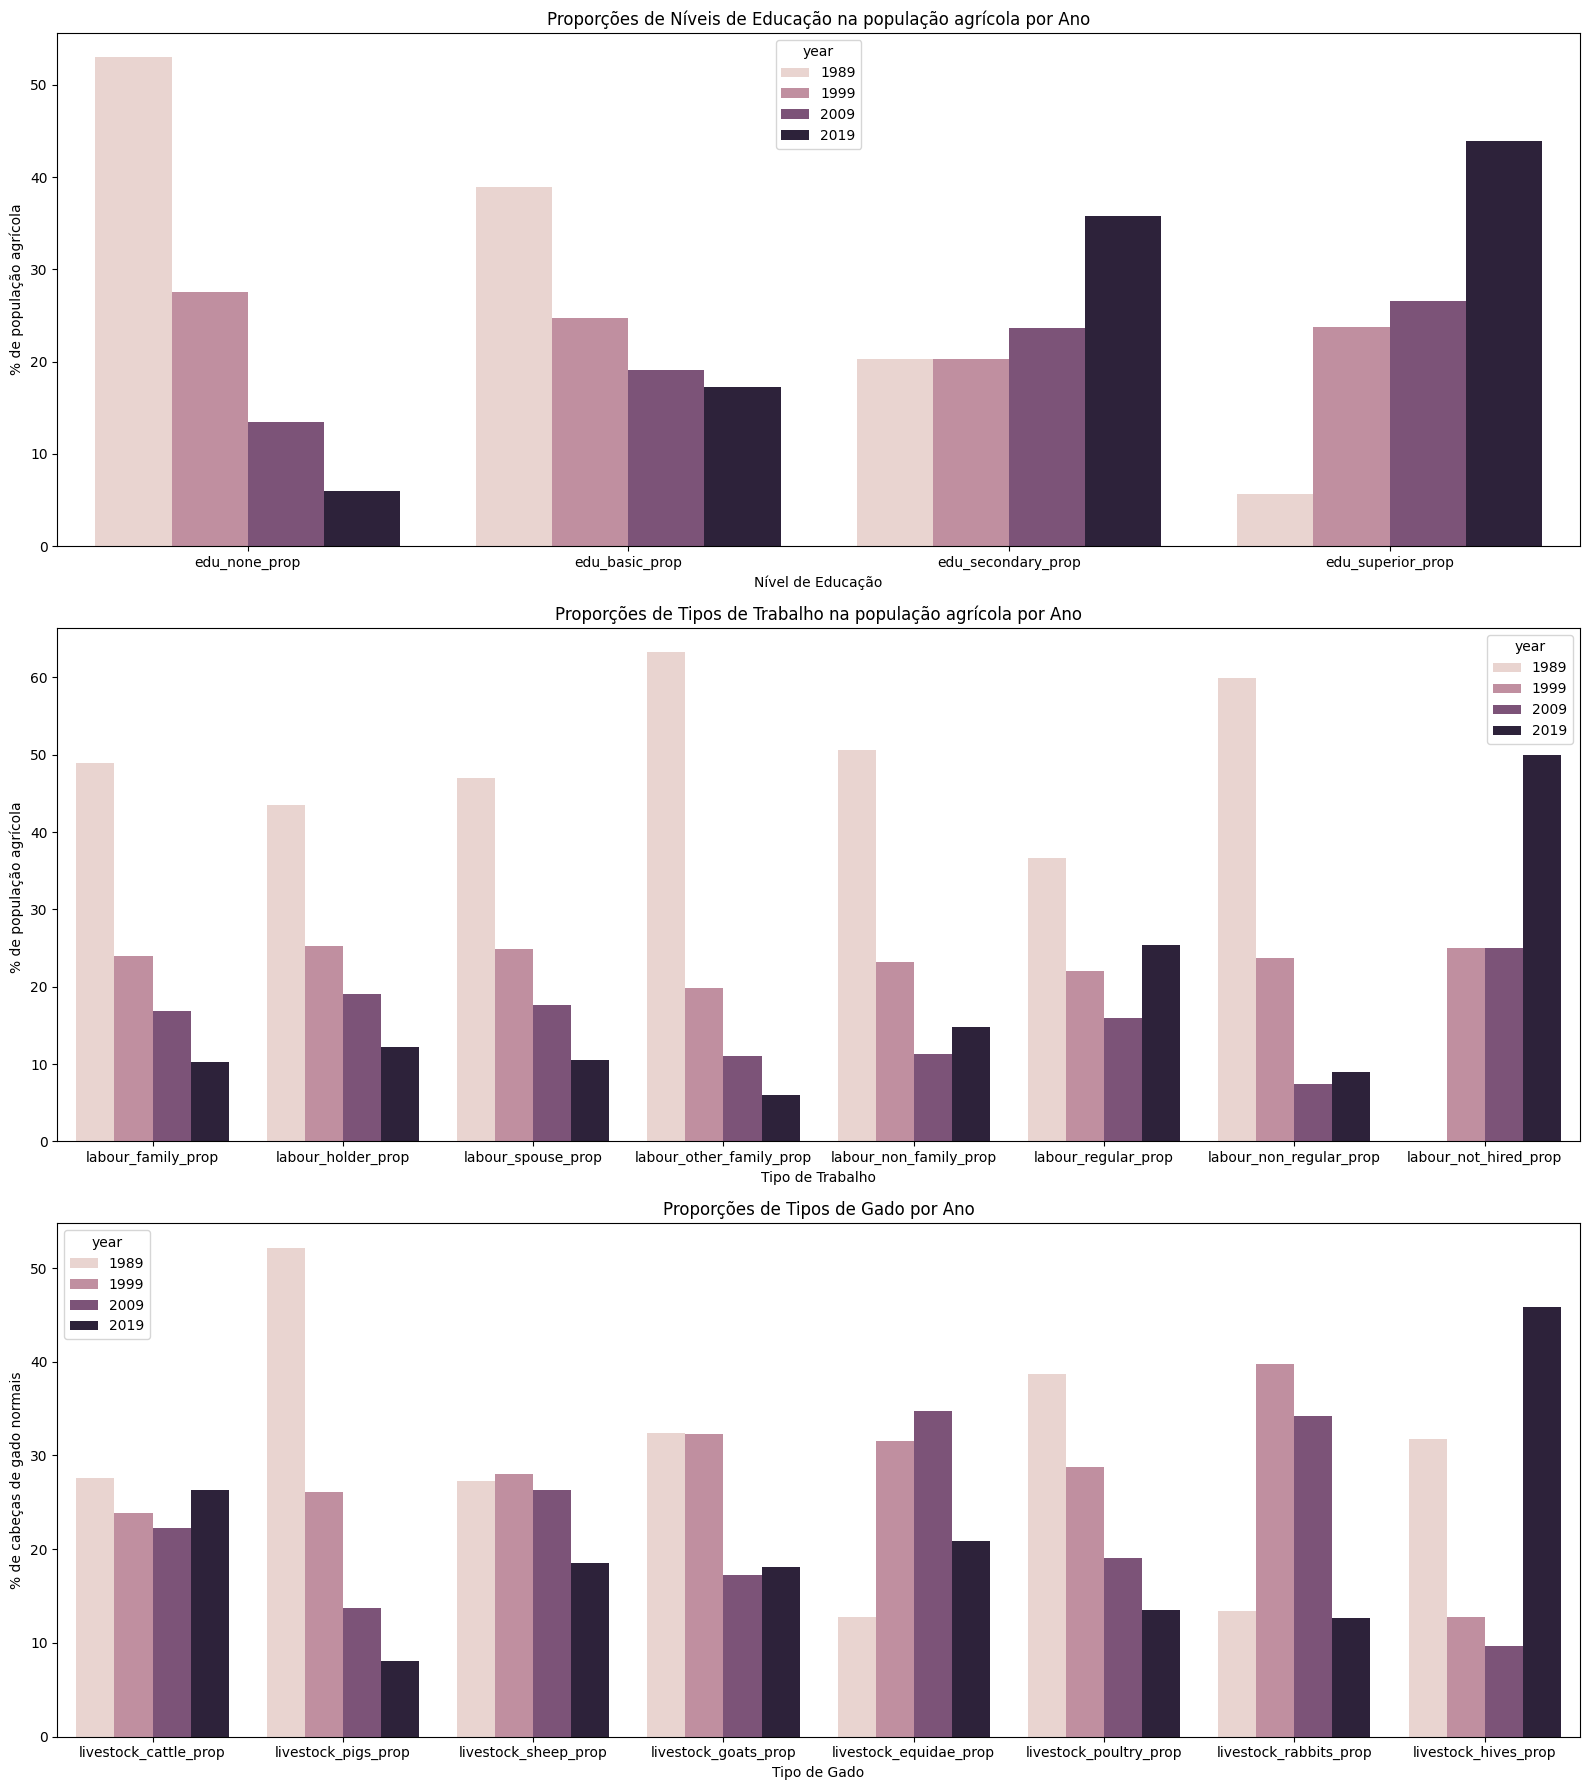

        Education             Labor          Livestock  Correlation   P-value
0        edu_none     labour_family   livestock_cattle     0.513036  0.486964
1        edu_none     labour_family     livestock_pigs     0.998465  0.001535
2        edu_none     labour_family    livestock_sheep     0.656222  0.343778
3        edu_none     labour_family    livestock_goats     0.846127  0.153873
4        edu_none     labour_family  livestock_equidae    -0.573393  0.426607
..            ...               ...                ...          ...       ...
251  edu_superior  labour_not_hired    livestock_goats    -0.739446  0.260554
252  edu_superior  labour_not_hired  livestock_equidae     0.348353  0.651647
253  edu_superior  labour_not_hired  livestock_poultry    -0.952537  0.047463
254  edu_superior  labour_not_hired  livestock_rabbits    -0.019174  0.980826
255  edu_superior  labour_not_hired    livestock_hives     0.317936  0.682064

[256 rows x 5 columns]


In [3]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar os dados
file_path = '/content/gado_e_dados_socio_economicos_aggregated_2_202406131349 (2).csv'
data = pd.read_csv(file_path)

# Definir as colunas relevantes
education_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
labor_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
                 'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep',
                     'livestock_goats', 'livestock_equidae', 'livestock_poultry',
                     'livestock_rabbits', 'livestock_hives']
time_column = 'year'  # Substitua pelo nome correto da coluna de tempo, se diferente

# Selecionar os anos de interesse
years_of_interest = [1989, 1999, 2009, 2019]

# Filtrar os dados para os anos de interesse
data_filtered = data[data[time_column].isin(years_of_interest)]

# Calcular proporções de níveis de educação, tipos de trabalho e tipos de gado por ano
data_grouped = data_filtered.groupby(time_column).sum()

# Calcular la suma total de cada columna de educación, trabajo y ganado por año
totals_per_year_education = data_grouped[education_columns].sum()
totals_per_year_labor = data_grouped[labor_columns].sum()
totals_per_year_livestock = data_grouped[livestock_columns].sum()

# Calcular los porcentajes por columna de educación
for col in education_columns:
    data_grouped[f'{col}_prop'] = (data_grouped[col] / totals_per_year_education[col]) * 100

# Calcular los porcentajes por columna de trabajo
for col in labor_columns:
    data_grouped[f'{col}_prop'] = (data_grouped[col] / totals_per_year_labor[col]) * 100

# Calcular los porcentajes por columna de ganado
for col in livestock_columns:
    data_grouped[f'{col}_prop'] = (data_grouped[col] / totals_per_year_livestock[col]) * 100

print(data_grouped.head())

# Preparar los datos para el gráfico
education_props = data_grouped[[f'{col}_prop' for col in education_columns]].reset_index()
education_props = education_props.melt(id_vars=time_column, var_name='Education', value_name='Prop')

labor_props = data_grouped[[f'{col}_prop' for col in labor_columns]].reset_index()
labor_props = labor_props.melt(id_vars=time_column, var_name='Labor', value_name='Prop')

livestock_props = data_grouped[[f'{col}_prop' for col in livestock_columns]].reset_index()
livestock_props = livestock_props.melt(id_vars=time_column, var_name='Livestock', value_name='Prop')


# Criar subplots para proporções de níveis de educação, tipos de trabalho e tipos de gado ao longo dos anos
plt.figure(figsize=(16, 18))

# Barplot para proporções de níveis de educação
plt.subplot(3, 1, 1)
sns.barplot(x='Education', y='Prop', hue=time_column, data=education_props)
plt.title('Proporções de Níveis de Educação na população agrícola por Ano')
plt.xlabel('Nível de Educação')
plt.ylabel('% de população agrícola')

# Barplot para proporções de tipos de trabalho
plt.subplot(3, 1, 2)
sns.barplot(x='Labor', y='Prop', hue=time_column, data=labor_props)
plt.title('Proporções de Tipos de Trabalho na população agrícola por Ano')
plt.xlabel('Tipo de Trabalho')
plt.ylabel('% de população agrícola ')

# Barplot para proporções de tipos de gado
plt.subplot(3, 1, 3)
sns.barplot(x='Livestock', y='Prop', hue=time_column, data=livestock_props)
plt.title('Proporções de Tipos de Gado por Ano')
plt.xlabel('Tipo de Gado')
plt.ylabel('% de cabeças de gado normais')

plt.tight_layout()
plt.show()

# Realizar Teste Estatístico (exemplo com Pearson)
results = []
for edu_col in education_columns:
    for lab_col in labor_columns:
        for livestock_col in livestock_columns:
            r, p_value = pearsonr(data_grouped[f'{edu_col}_prop'], data_grouped[f'{livestock_col}_prop'])
            results.append((edu_col, lab_col, livestock_col, r, p_value))

# Converter os resultados para um DataFrame para melhor visualização
results_df = pd.DataFrame(results, columns=['Education', 'Labor', 'Livestock', 'Correlation', 'P-value'])
print(results_df)

###UNIVARIATE ANAYLISIS

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
file_path = '/content/tabela-recenseamentoAgricolaINE-csv (5).csv'
dataavcad = pd.read_csv(file_path)

print(dataavcad)
dataavcad.head(10)
dataavcad.info()
list(dataavcad.columns)
dataavcad.count()

# Number of missing values (NaN) per variable
dataavcad.isnull().sum()
dataavcad.describe()

          NutsID   nutsid2 DICOFRE  \
0      111160101     Norte  160101   
1      111160101     Norte  160101   
2      111160101     Norte  160101   
3      111160101     Norte  160101   
4      111160102     Norte  160102   
...          ...       ...     ...   
11523  187071404  Alentejo   71404   
11524  187071406  Alentejo   71406   
11525  187071406  Alentejo   71406   
11526  187071406  Alentejo   71406   
11527  187071406  Alentejo   71406   

                                       region_name  year  edu_none  edu_basic  \
0                                 Aboim das Choças  2019        15         61   
1                                 Aboim das Choças  2009        30         57   
2                                 Aboim das Choças  1999        49         73   
3                                 Aboim das Choças  1989       167         97   
4                                            Aguiã  2019        24         68   
...                                            ...   ... 

year      edu_none     edu_basic  edu_secondary  edu_superior  \
count  11528.000000  11528.000000  11528.000000    11528.00000  11528.000000   
mean    2004.000000    118.076856    204.742280       28.80465     15.493147   
std       11.180825    163.280984    206.063604       32.19049     19.082666   
min     1989.000000      0.000000      0.000000        0.00000      0.000000   
25%     1996.500000     23.000000     79.000000        9.00000      4.000000   
50%     2004.000000     61.000000    146.000000       19.00000      9.000000   
75%     2011.500000    149.000000    257.000000       37.00000     20.000000   
max     2019.000000   2088.000000   2381.000000      394.00000    212.000000   

       labour_family  labour_holder  labour_spouse  labour_other_family  \
count   11528.000000   11528.000000   11528.000000         11528.000000   
mean      135.850017      67.254511      43.840996            24.859386   
std       151.810015      70.284225      56.570835            32.800615   
min         0.000000       0.000000       0.000000             0.000000   
25%        47.000000      25.000000      13.000000             6.000000   
50%        90.000000      47.000000      27.000000            14.000000   
75%       169.000000      85.000000      54.000000            30.000000   
max      2158.000000     856.000000    1007.000000           456.000000   

       labour_non_family  ...  labour_non_regular  labour_not_hired  \
count       11528.000000  ...        11528.000000      11528.000000   
mean           32.673924  ...           13.704545          1.653626   
std            73.835423  ...           28.906963         11.161457   
min             0.000000  ...            0.000000          0.000000   
25%             4.000000  ...            2.000000          0.000000   
50%            12.000000  ...            5.000000          0.000000   
75%            32.000000  ...           14.000000          1.000000   
max          3592.000000  ...          636.000000        751.000000   

       livestock_cattle  livestock_pigs  livestock_sheep  livestock_goats  \
count      11528.000000    11528.000000     11528.000000      11528.00000   
mean         419.728053      757.065146       885.326509        171.86034   
std         1061.725826     4568.795768      2351.426617        338.79001   
min            0.000000        0.000000         0.000000          0.00000   
25%           22.000000       10.000000        54.750000          9.00000   
50%          119.000000       43.000000       217.000000         49.00000   
75%          357.000000      180.000000       703.000000        179.00000   
max        27864.000000   218151.000000     42313.000000       4635.00000   

       livestock_equidae  livestock_poultry  livestock_rabbits  \
count       11528.000000       1.152800e+04       11528.000000   
mean           27.983518       1.381907e+04         400.888706   
std            50.320633       8.125175e+04        2036.424764   
min             0.000000       0.000000e+00           0.000000   
25%             2.000000       3.500000e+02          33.000000   
50%             9.000000       8.260000e+02         109.000000   
75%            32.000000       2.004250e+03         266.000000   
max           994.000000       3.683132e+06       98557.000000   

       livestock_hives  
count     11528.000000  
mean        132.996357  
std         372.961642  
min           0.000000  
25%           2.000000  
50%          26.000000  
75%         106.250000  
max        8019.000000  

[8 rows x 21 columns]

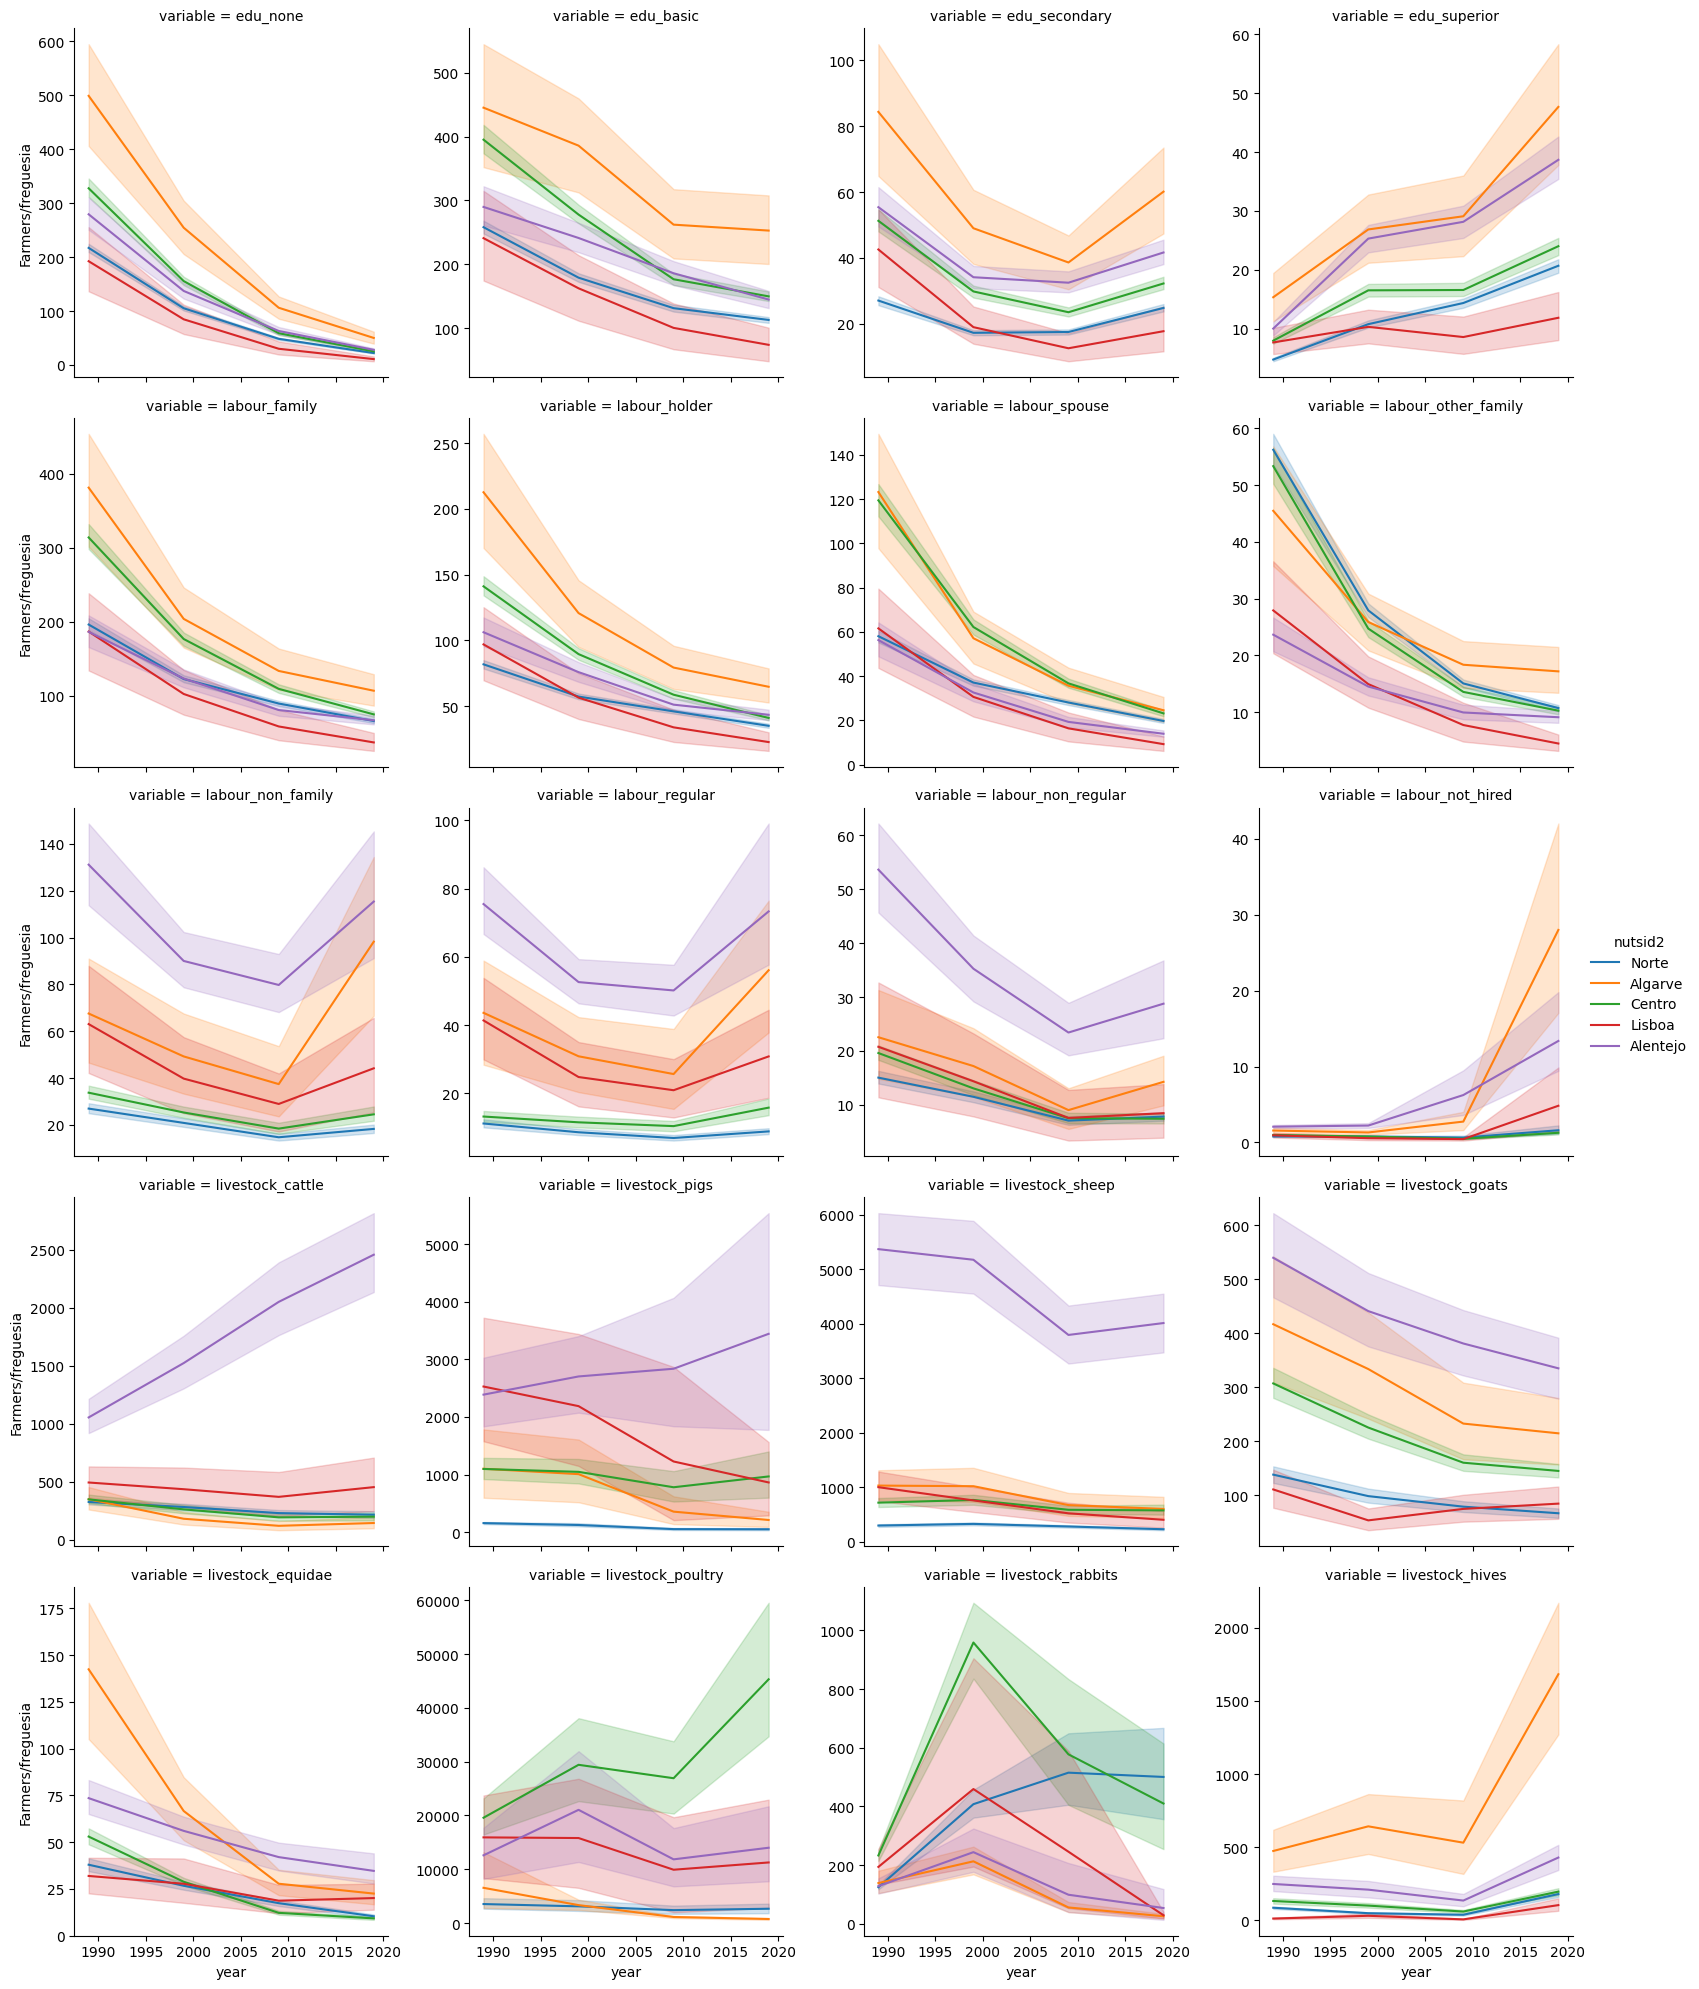

In [7]:
# Definir as listas de colunas relevantes
education_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
labor_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
                 'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep',
                     'livestock_goats', 'livestock_equidae', 'livestock_poultry',
                     'livestock_rabbits', 'livestock_hives']

# Unir todas as colunas de interesse
all_columns = education_columns + labor_columns + livestock_columns

# Criar uma nova coluna 'variable' e 'value' para uso com FacetGrid
data_melted = dataavcad.melt(id_vars=["year", "nutsid2"], value_vars=all_columns, var_name="variable", value_name="Farmers/freguesia")

# Criar FacetGrid
g = sns.FacetGrid(data_melted, col="variable", col_wrap=4, hue="nutsid2", sharey=False, sharex=True, height=4)
g = g.map(sns.lineplot, "year", "Farmers/freguesia").add_legend()

plt.show()

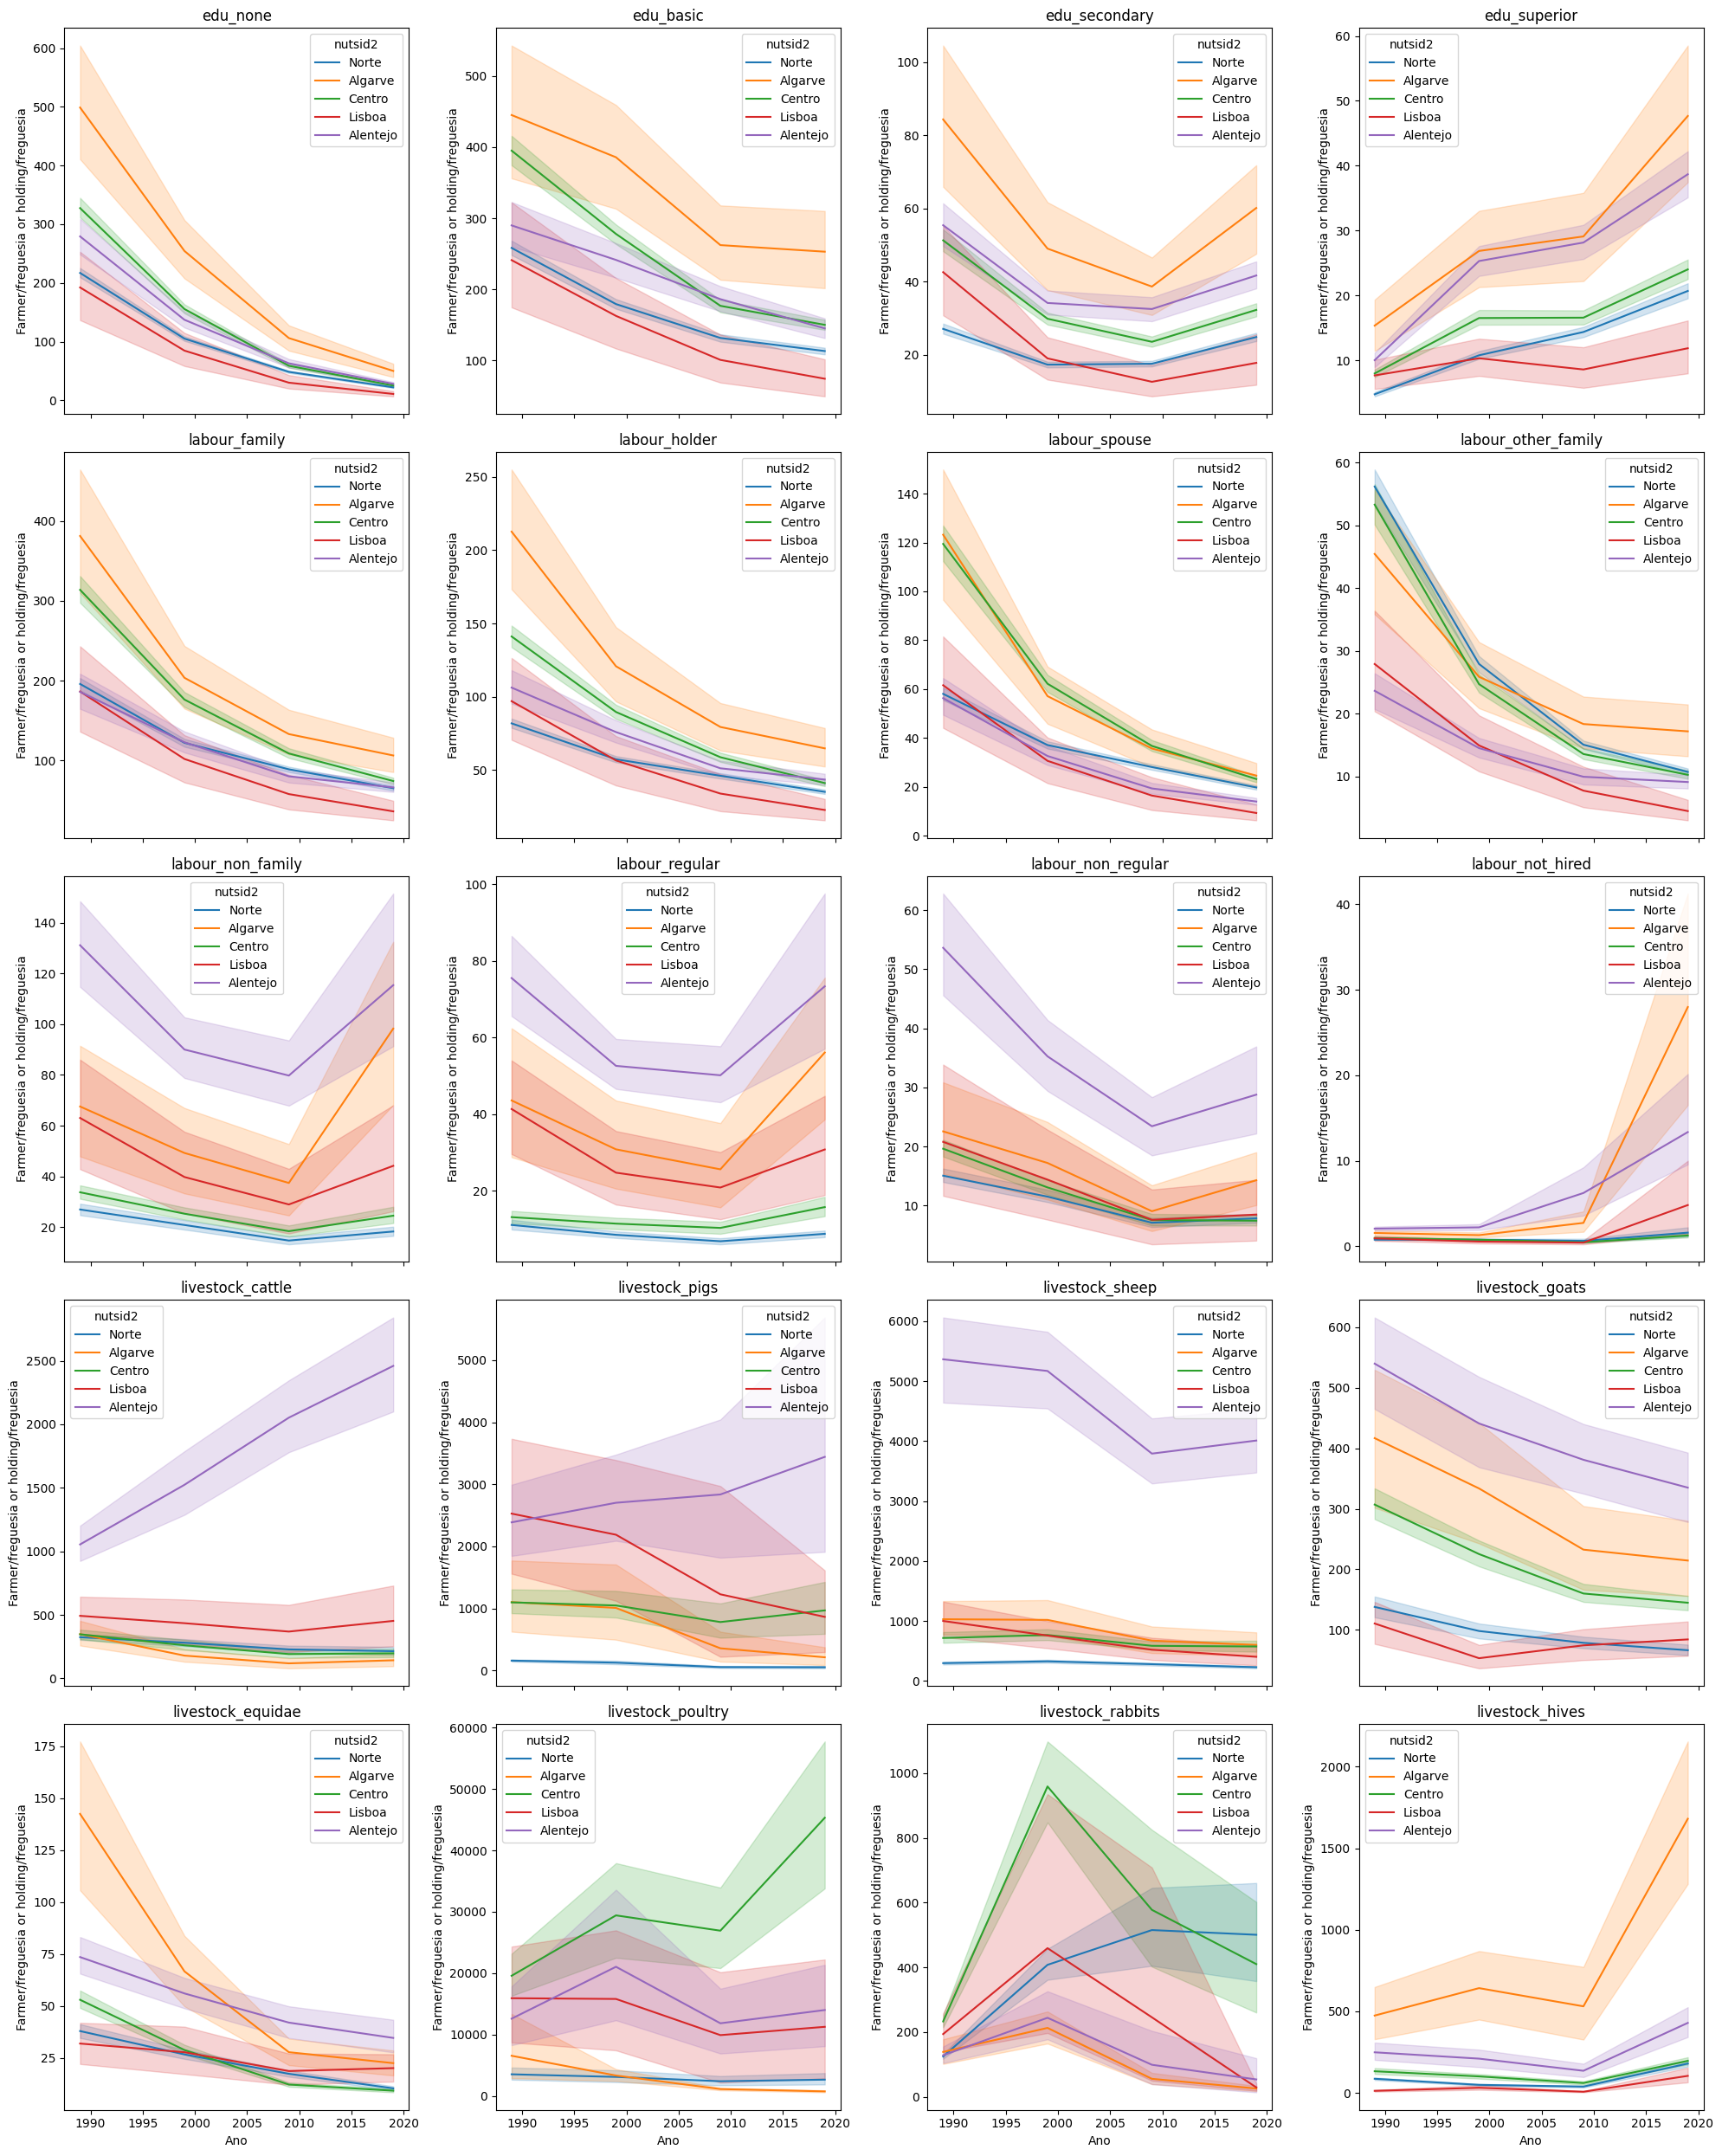

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
file_path = '/content/tabela-recenseamentoAgricolaINE-csv (5).csv'
dataavcad = pd.read_csv(file_path)

# Definir as listas de colunas relevantes
education_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
labor_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
                 'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep',
                     'livestock_goats', 'livestock_equidae', 'livestock_poultry',
                     'livestock_rabbits', 'livestock_hives']

# Unir todas as colunas de interesse
all_columns = education_columns + labor_columns + livestock_columns

# Número de colunas e linhas para os subplots
n_cols = 4
n_rows = (len(all_columns) + n_cols - 1) // n_cols  # Calcula o número necessário de linhas

# Definir o tamanho da figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), sharex=True)

# Achatar os eixos para fácil iteração
axes = axes.flatten()

# Iterar sobre todas as colunas de interesse e criar gráficos de linha
for ax, col in zip(axes, all_columns):
    sns.lineplot(data=dataavcad, x="year", y=col, hue="nutsid2", ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Farmer/freguesia or holding/freguesia')
    ax.set_xlabel('Ano')

# Remover eixos extras, se houver
for i in range(len(all_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


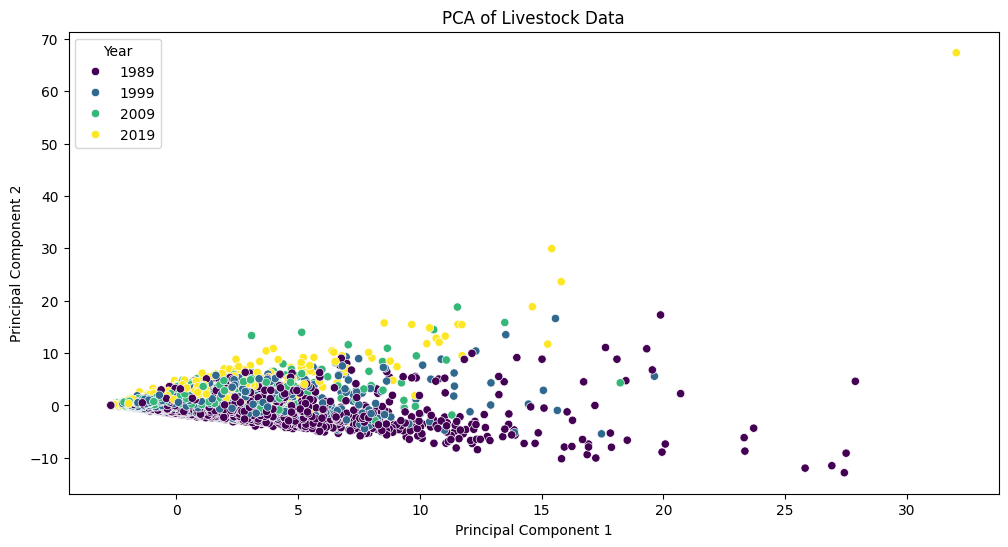

[0.35726841 0.15427759]


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Carregar os dados
file_path = '/content/tabela-recenseamentoAgricolaINE-csv (5).csv'
dataavcad = pd.read_csv(file_path)

# Definir as listas de colunas relevantes
education_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
labor_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
                 'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep',
                     'livestock_goats', 'livestock_equidae', 'livestock_poultry',
                     'livestock_rabbits', 'livestock_hives']

# Selecionar colunas de interesse para PCA e LDA
columns_of_interest = education_columns + labor_columns + livestock_columns

# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataavcad[columns_of_interest])

# Executar PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Adicionar os componentes principais ao DataFrame
dataavcad['PCA1'] = pca_components[:, 0]
dataavcad['PCA2'] = pca_components[:, 1]

# Plotar os resultados da PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataavcad, x='PCA1', y='PCA2', hue='year', palette='viridis')
plt.title('PCA of Livestock Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Year')
plt.show()
print(pca.explained_variance_ratio_)



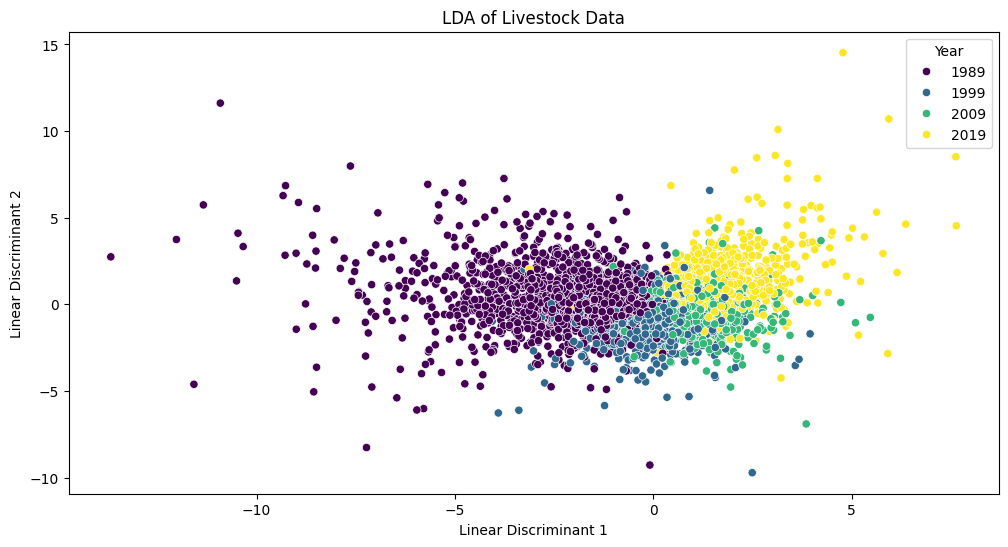

[[-1.40775291e+00  3.92230193e-01  1.00201805e+00]
 [ 1.69381291e-01 -1.69339145e+00  1.15757544e+00]
 [-3.37391630e-01  1.65474217e+00 -8.93815687e-01]
 [ 6.83202717e-01 -1.18657837e-02  6.21110986e-01]
 [ 1.28494652e+00 -5.46745209e+00 -1.18195082e+01]
 [ 1.78039043e-01  1.39435197e+00  4.23296790e+00]
 [-2.91670332e-01  2.65909716e+00  3.96953226e+00]
 [-8.76990495e-01  1.85966292e+00  2.54177766e+00]
 [ 5.89215111e+00 -1.07269562e+00 -3.23221163e+01]
 [-3.87200075e+00  7.56833078e-01  2.06408223e+01]
 [-2.41216154e+00  3.03787688e-01  1.28882093e+01]
 [-8.68256097e-01  2.15830578e-01  4.91092019e+00]
 [ 1.30065527e-01  6.99134617e-02 -1.23983416e-01]
 [ 4.95871101e-02  3.46858687e-02  3.94691793e-02]
 [-1.34963322e-01 -2.02699325e-01  4.65658320e-02]
 [ 4.71340104e-02 -5.46949420e-02 -1.94151016e-01]
 [-1.98547797e-01 -1.33074478e-01  1.53483015e-01]
 [ 6.07480103e-02  7.38894684e-02  1.67169788e-01]
 [ 6.04032093e-02 -9.29516094e-02  1.42643058e-01]
 [ 6.78754172e-02  4.24591687e-

In [10]:
# Executar LDA
lda = LDA(n_components=2)
lda_components = lda.fit_transform(data_scaled, dataavcad['year'])

# Adicionar os componentes da LDA ao DataFrame
dataavcad['LDA1'] = lda_components[:, 0]
dataavcad['LDA2'] = lda_components[:, 1]

# Plotar os resultados da LDA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataavcad, x='LDA1', y='LDA2', hue='year', palette='viridis')
plt.title('LDA of Livestock Data')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Year')
plt.show()
print(lda.scalings_)


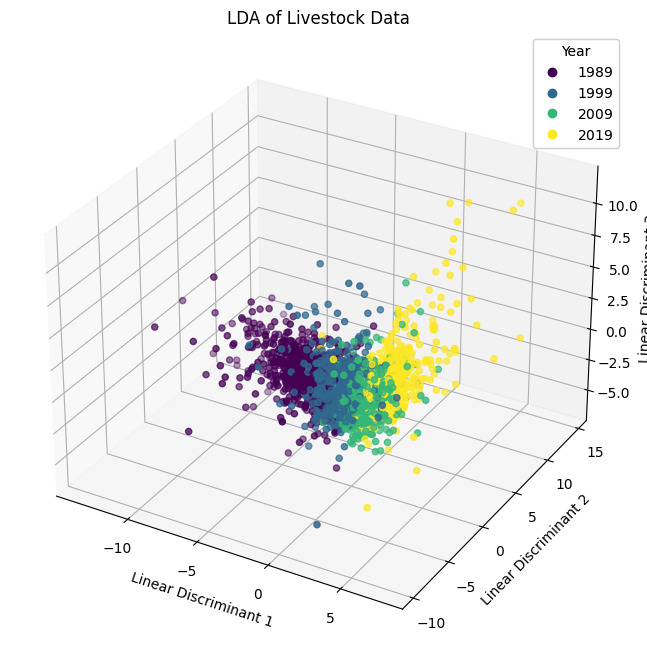

Coeficientes das variáveis originais na LDA:
                          LD1       LD2        LD3
edu_none            -1.407753  0.392230   1.002018
edu_basic            0.169381 -1.693391   1.157575
edu_secondary       -0.337392  1.654742  -0.893816
edu_superior         0.683203 -0.011866   0.621111
labour_family        1.284947 -5.467452 -11.819508
labour_holder        0.178039  1.394352   4.232968
labour_spouse       -0.291670  2.659097   3.969532
labour_other_family -0.876990  1.859663   2.541778
labour_non_family    5.892151 -1.072696 -32.322116
labour_regular      -3.872001  0.756833  20.640822
labour_non_regular  -2.412162  0.303788  12.888209
labour_not_hired    -0.868256  0.215831   4.910920
livestock_cattle     0.130066  0.069913  -0.123983
livestock_pigs       0.049587  0.034686   0.039469
livestock_sheep     -0.134963 -0.202699   0.046566
livestock_goats      0.047134 -0.054695  -0.194151
livestock_equidae   -0.198548 -0.133074   0.153483
livestock_poultry    0.060748  0.0738

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Carregar os dados
file_path = '/content/tabela-recenseamentoAgricolaINE-csv (5).csv'
dataavcad = pd.read_csv(file_path)

education_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
labor_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
                 'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep',
                     'livestock_goats', 'livestock_equidae', 'livestock_poultry',
                     'livestock_rabbits', 'livestock_hives']

# Selecionar colunas de interesse para PCA e LDA
columns_of_interest = education_columns + labor_columns + livestock_columns


# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataavcad[columns_of_interest])

# Executar LDA
lda = LDA(n_components=3)
lda_components = lda.fit_transform(data_scaled, dataavcad['year'])

# Adicionar os componentes da LDA ao DataFrame
dataavcad['LDA1'] = lda_components[:, 0]
dataavcad['LDA2'] = lda_components[:, 1]
dataavcad['LDA3'] = lda_components[:, 2]

# Plotar os resultados da LDA em 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(dataavcad['LDA1'], dataavcad['LDA2'], dataavcad['LDA3'], c=dataavcad['year'], cmap='viridis')

ax.set_title('LDA of Livestock Data')
ax.set_xlabel('Linear Discriminant 1')
ax.set_ylabel('Linear Discriminant 2')
ax.set_zlabel('Linear Discriminant 3')

# Adicionar a legenda
legend = ax.legend(*sc.legend_elements(), title="Year")
ax.add_artist(legend)

plt.show()

# Coeficientes das variáveis originais na LDA
lda_coefficients = pd.DataFrame(lda.scalings_, index=columns_of_interest, columns=['LD1', 'LD2', 'LD3'])
print("Coeficientes das variáveis originais na LDA:")
print(lda_coefficients)


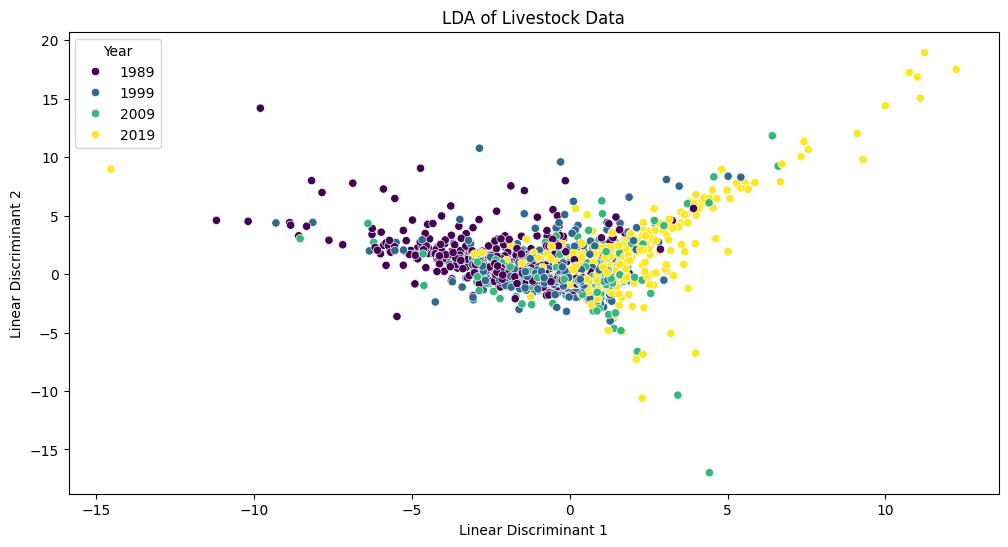

[[ 0.28392825 -0.00832605 -0.38147648]
 [ 0.00145679  0.04749151  0.05684731]
 [-0.03899052 -0.25229206  0.65085989]
 [-0.30599626 -0.05574613 -0.30099212]
 [-0.90658969  0.39786439  0.21833692]
 [ 0.10098667  0.08395478  0.25569012]
 [ 0.09764039 -0.34226041  0.72067889]
 [ 0.59801162  0.86319071  0.20342947]]
Coeficientes das variáveis originais na LDA:
                        LD1       LD2       LD3
livestock_cattle   0.283928 -0.008326 -0.381476
livestock_pigs     0.001457  0.047492  0.056847
livestock_sheep   -0.038991 -0.252292  0.650860
livestock_goats   -0.305996 -0.055746 -0.300992
livestock_equidae -0.906590  0.397864  0.218337
livestock_poultry  0.100987  0.083955  0.255690
livestock_rabbits  0.097640 -0.342260  0.720679
livestock_hives    0.598012  0.863191  0.203429


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Carregar os dados
file_path = '/content/tabela-recenseamentoAgricolaINE-csv (5).csv'
dataavcad = pd.read_csv(file_path)

# Definir as listas de colunas relevantes
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep',
                     'livestock_goats', 'livestock_equidae', 'livestock_poultry',
                     'livestock_rabbits', 'livestock_hives']

# Selecionar colunas de interesse para LDA
columns_of_interest = livestock_columns

# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataavcad[columns_of_interest])

# Executar LDA apenas com as variáveis de gado
lda = LDA(n_components=2)
lda_components = lda.fit_transform(data_scaled, dataavcad['year'])

# Adicionar os componentes da LDA ao DataFrame
dataavcad['LDA1'] = lda_components[:, 0]
dataavcad['LDA2'] = lda_components[:, 1]

# Plotar os resultados da LDA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataavcad, x='LDA1', y='LDA2', hue='year', palette='viridis')
plt.title('LDA of Livestock Data')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Year')
plt.show()

print(lda.scalings_)
# Coeficientes das variáveis originais na LDA
lda_coefficients = pd.DataFrame(lda.scalings_, index=columns_of_interest, columns=['LD1', 'LD2', 'LD3'])
print("Coeficientes das variáveis originais na LDA:")
print(lda_coefficients)



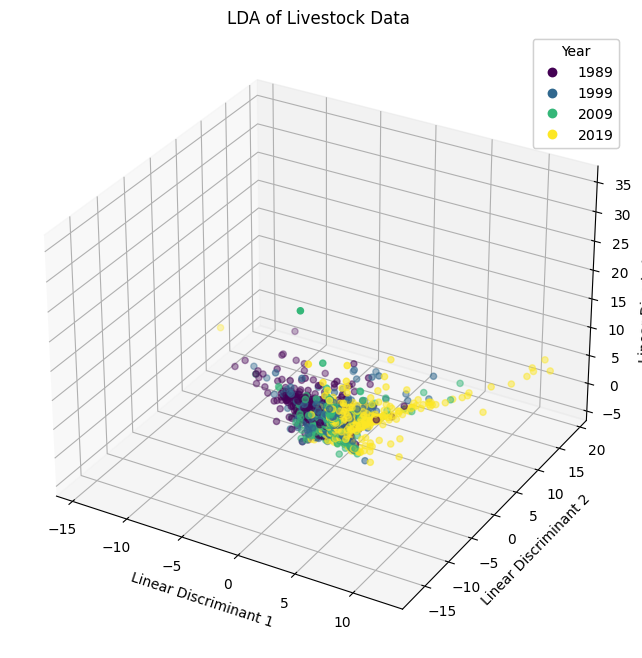

Coeficientes das variáveis originais na LDA:
                        LD1       LD2       LD3
livestock_cattle   0.283928 -0.008326 -0.381476
livestock_pigs     0.001457  0.047492  0.056847
livestock_sheep   -0.038991 -0.252292  0.650860
livestock_goats   -0.305996 -0.055746 -0.300992
livestock_equidae -0.906590  0.397864  0.218337
livestock_poultry  0.100987  0.083955  0.255690
livestock_rabbits  0.097640 -0.342260  0.720679
livestock_hives    0.598012  0.863191  0.203429


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Carregar os dados
file_path = '/content/tabela-recenseamentoAgricolaINE-csv (5).csv'
dataavcad = pd.read_csv(file_path)

# Definir as listas de colunas relevantes
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep',
                     'livestock_goats', 'livestock_equidae', 'livestock_poultry',
                     'livestock_rabbits', 'livestock_hives']

# Selecionar colunas de interesse para LDA
columns_of_interest = livestock_columns

# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataavcad[columns_of_interest])

# Executar LDA apenas com as variáveis de gado
lda = LDA(n_components=3)
lda_components = lda.fit_transform(data_scaled, dataavcad['year'])

# Adicionar os componentes da LDA ao DataFrame
dataavcad['LDA1'] = lda_components[:, 0]
dataavcad['LDA2'] = lda_components[:, 1]
dataavcad['LDA3'] = lda_components[:, 2]

# Plotar os resultados da LDA em 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(dataavcad['LDA1'], dataavcad['LDA2'], dataavcad['LDA3'], c=dataavcad['year'], cmap='viridis')

ax.set_title('LDA of Livestock Data')
ax.set_xlabel('Linear Discriminant 1')
ax.set_ylabel('Linear Discriminant 2')
ax.set_zlabel('Linear Discriminant 3')

# Adicionar a legenda
legend = ax.legend(*sc.legend_elements(), title="Year")
ax.add_artist(legend)

plt.show()

# Coeficientes das variáveis originais na LDA
lda_coefficients = pd.DataFrame(lda.scalings_, index=columns_of_interest, columns=['LD1', 'LD2', 'LD3'])
print("Coeficientes das variáveis originais na LDA:")
print(lda_coefficients)


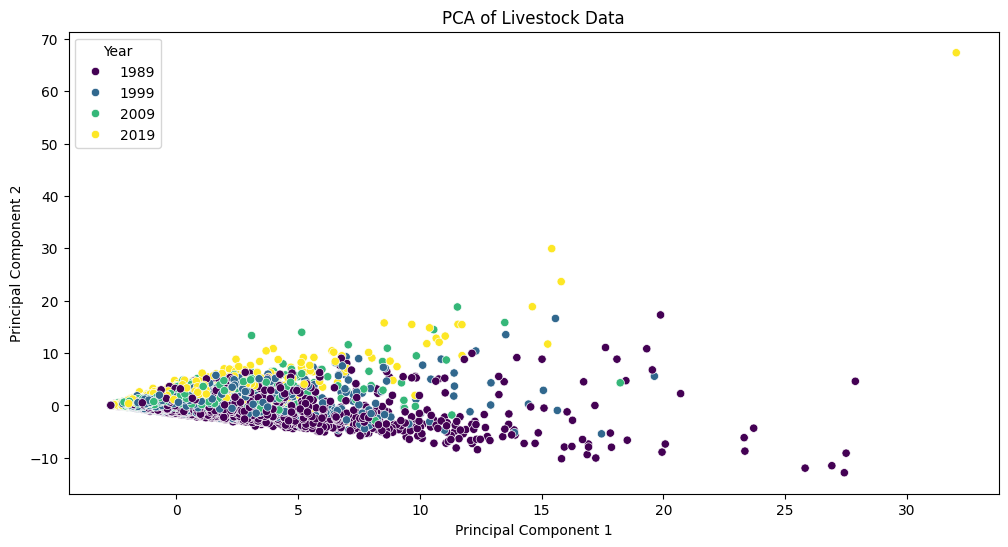

Variância explicada pelos componentes principais: [0.35726841 0.15427759]


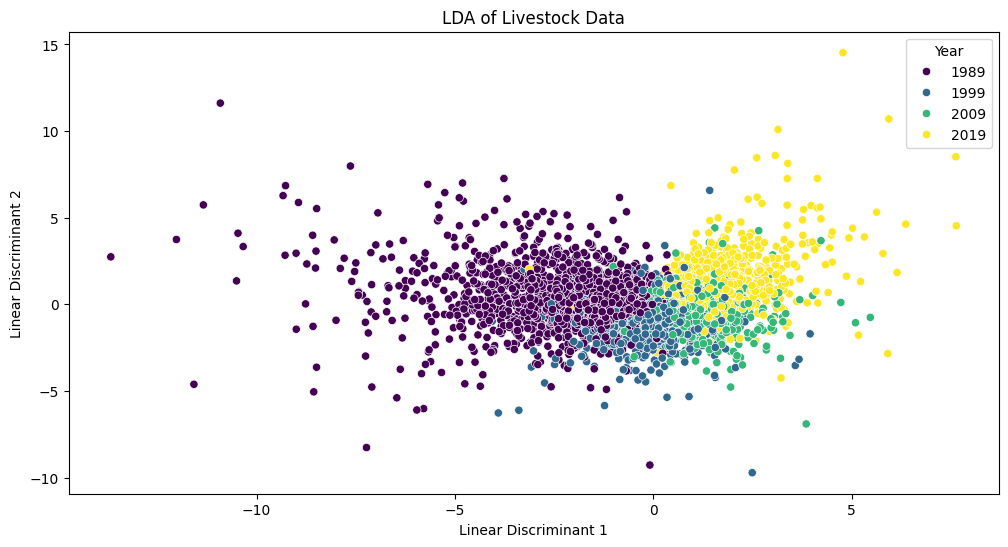

Coeficientes das variáveis originais na LDA:
                          LD1       LD2        LD3
edu_none            -1.407753  0.392230   1.002018
edu_basic            0.169381 -1.693391   1.157575
edu_secondary       -0.337392  1.654742  -0.893816
edu_superior         0.683203 -0.011866   0.621111
labour_family        1.284947 -5.467452 -11.819508
labour_holder        0.178039  1.394352   4.232968
labour_spouse       -0.291670  2.659097   3.969532
labour_other_family -0.876990  1.859663   2.541778
labour_non_family    5.892151 -1.072696 -32.322116
labour_regular      -3.872001  0.756833  20.640822
labour_non_regular  -2.412162  0.303788  12.888209
labour_not_hired    -0.868256  0.215831   4.910920
livestock_cattle     0.130066  0.069913  -0.123983
livestock_pigs       0.049587  0.034686   0.039469
livestock_sheep     -0.134963 -0.202699   0.046566
livestock_goats      0.047134 -0.054695  -0.194151
livestock_equidae   -0.198548 -0.133074   0.153483
livestock_poultry    0.060748  0.0738

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Carregar os dados
file_path = '/content/tabela-recenseamentoAgricolaINE-csv (5).csv'
dataavcad = pd.read_csv(file_path)

# Definir as listas de colunas relevantes
education_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
labor_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
                 'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
livestock_columns = ['livestock_cattle', 'livestock_pigs', 'livestock_sheep',
                     'livestock_goats', 'livestock_equidae', 'livestock_poultry',
                     'livestock_rabbits', 'livestock_hives']

# Selecionar colunas de interesse para PCA e LDA
columns_of_interest = education_columns + labor_columns + livestock_columns

# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataavcad[columns_of_interest])

# Executar PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Adicionar os componentes principais ao DataFrame
dataavcad['PCA1'] = pca_components[:, 0]
dataavcad['PCA2'] = pca_components[:, 1]

# Plotar os resultados da PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataavcad, x='PCA1', y='PCA2', hue='year', palette='viridis')
plt.title('PCA of Livestock Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Year')
plt.show()

# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print("Variância explicada pelos componentes principais:", explained_variance)

# Executar LDA
lda = LDA(n_components=2)
lda_components = lda.fit_transform(data_scaled, dataavcad['year'])

# Adicionar os componentes da LDA ao DataFrame
dataavcad['LDA1'] = lda_components[:, 0]
dataavcad['LDA2'] = lda_components[:, 1]

# Plotar os resultados da LDA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataavcad, x='LDA1', y='LDA2', hue='year', palette='viridis')
plt.title('LDA of Livestock Data')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Year')
plt.show()

# Coeficientes das variáveis originais na LDA
lda_coefficients = pd.DataFrame(lda.scalings_, index=columns_of_interest, columns=['LD1', 'LD2', 'LD3'])
print("Coeficientes das variáveis originais na LDA:")
print(lda_coefficients)


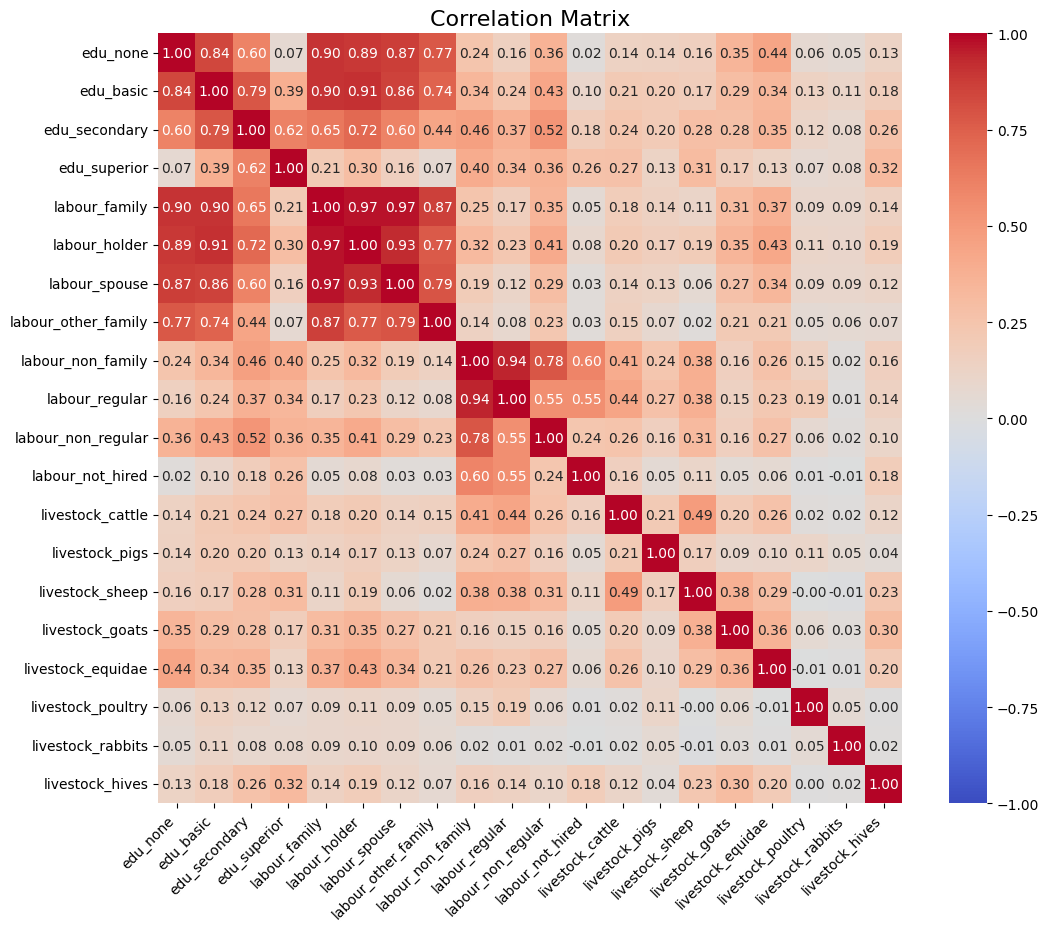

In [15]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Provide the path to your CSV file
file_path = '/content/tabela-recenseamentoAgricolaINE-csv (5).csv'

# Load the data
data = pd.read_csv(file_path)

# Select relevant columns for the correlation matrix
relevant_columns = [
    'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior',
    'labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
    'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired',
    'livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_goats',
    'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives'
]

# Compute the correlation matrix
correlation_matrix = data[relevant_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with a red color scheme and values from -1 to 1
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, vmin=-1, vmax=1)

# Set titles and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()
